In [1]:
# Import necessary libraries 
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset (Ensure the CSV file is in the same directory or provide the full path)
df = pd.read_csv("TelcoCustomerChurn.csv")

In [3]:
# Display the first few rows to understand the structure of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

In [4]:
# Display dataset information (column types, missing values, etc.)
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# Get basic statistics of numerical features
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())


Statistical Summary of Numerical Columns:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [7]:
# Get basic statistics of categorical features
print("\nStatistical Summary of Categorical Columns:")
print(df.describe(include=['O']))


Statistical Summary of Categorical Columns:
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No       

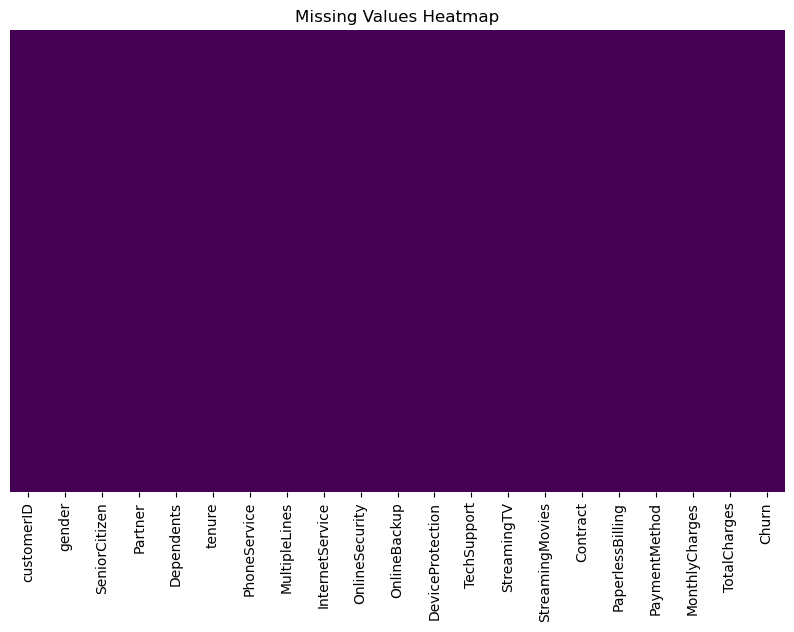

In [8]:
# Visualizing missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

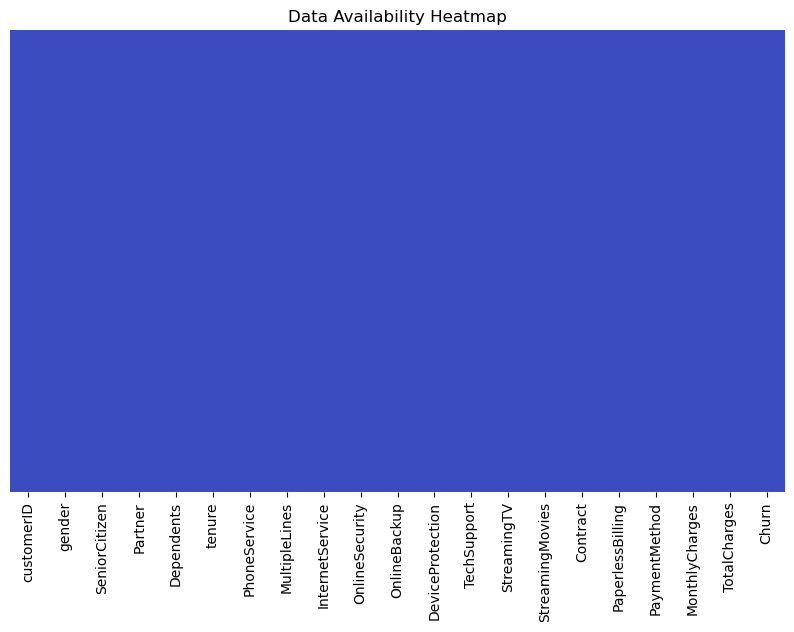

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.notnull(), cmap="coolwarm", cbar=False, yticklabels=False)
plt.title("Data Availability Heatmap")
plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_10120\2534945551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=['blue', 'red'])


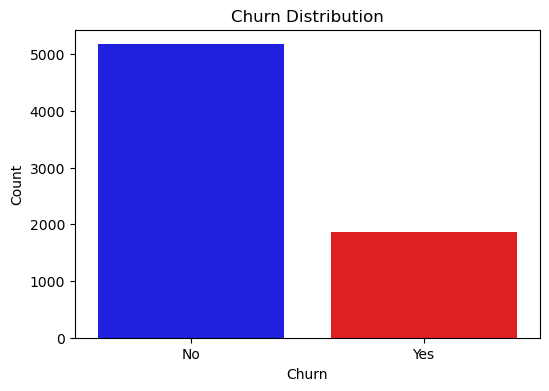

In [10]:
# Checking the distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette=['blue', 'red'])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [11]:
# Convert 'TotalCharges' column to numeric (Some values are strings due to empty spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
# Handling missing values in 'TotalCharges' (Filling with median value)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_10120\3257100319.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [13]:
# Drop 'customerID' column as it is not useful for analysis
df.drop(columns=['customerID'], inplace=True)

In [14]:
# Encoding categorical variables
label_enc = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

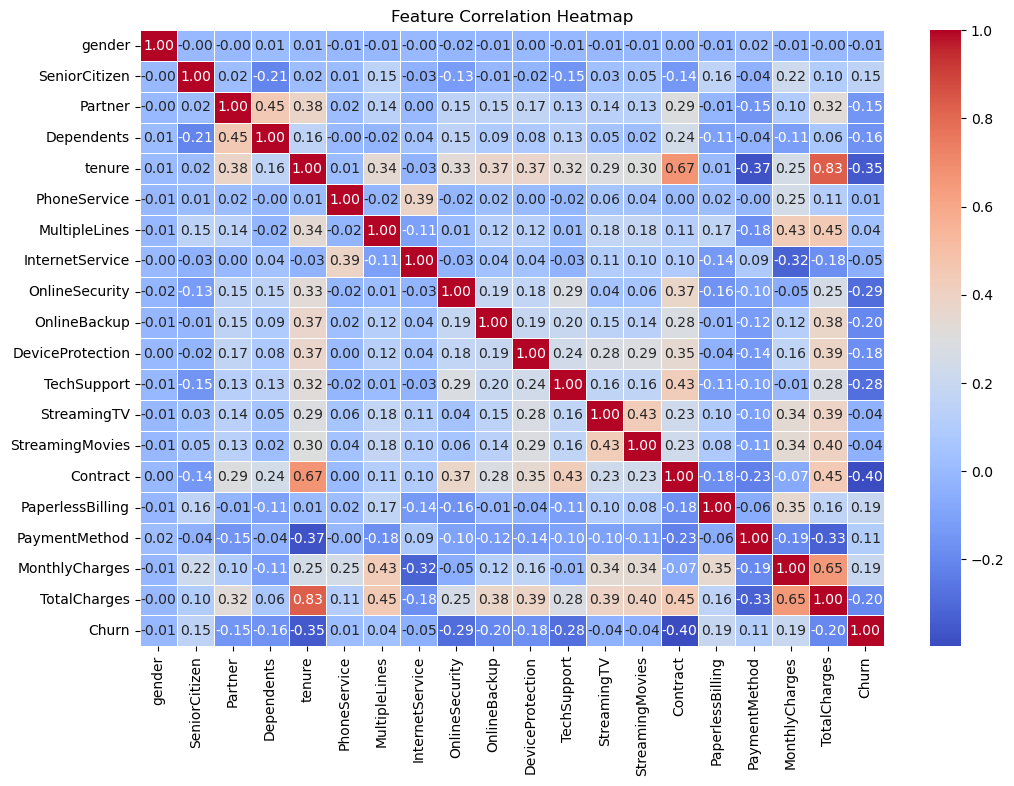

In [15]:
# Checking correlation between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

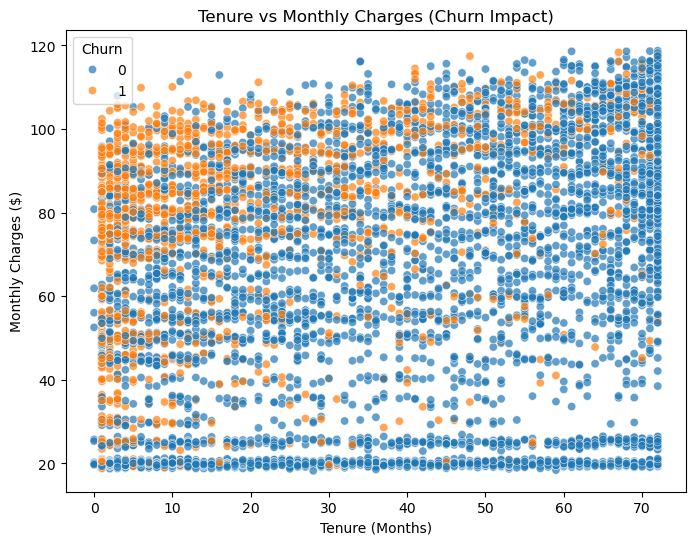

In [16]:
# Analyzing the relationship between tenure and monthly charges
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.7)
plt.title("Tenure vs Monthly Charges (Churn Impact)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges ($)")
plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_10120\1503363861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['blue', 'red'])


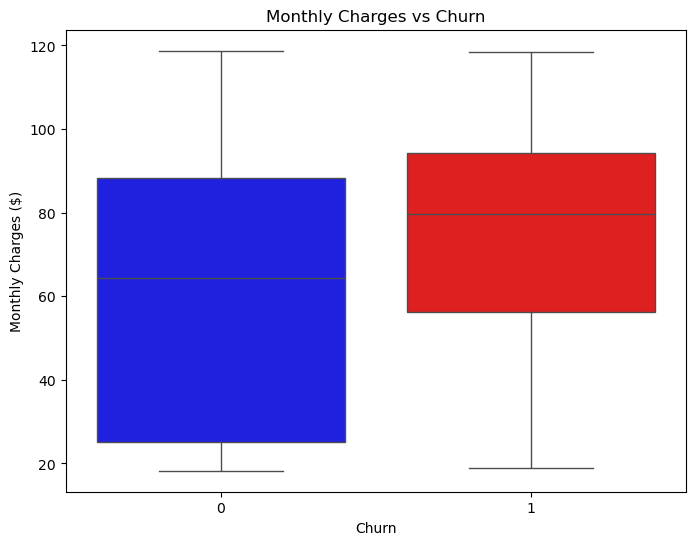

In [17]:
# Boxplot to visualize distribution of Monthly Charges across Churn categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['blue', 'red'])
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges ($)")
plt.show()

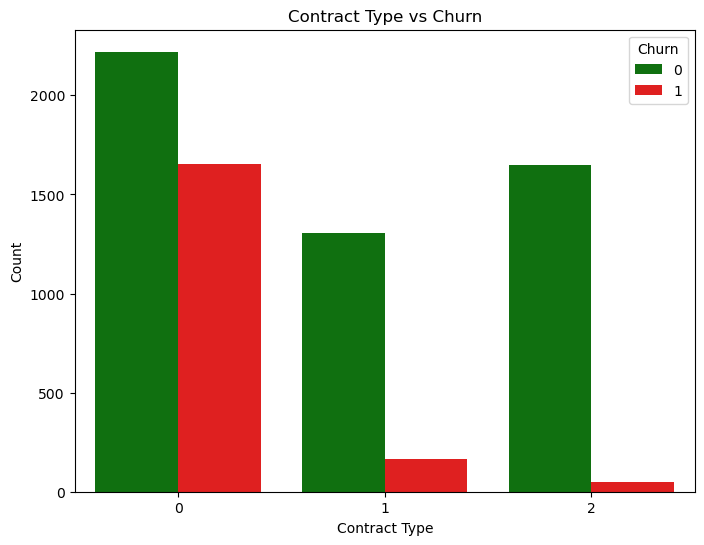


Exploratory Data Analysis Completed Successfully!


In [18]:
# Barplot to analyze contract type impact on churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette=['green', 'red'])
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

print("\nExploratory Data Analysis Completed Successfully!")